In [11]:
# by Joh Schöneberg, 2017/2018

In [12]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import pims
from PIL import Image
from skimage.filters import threshold_li

In [13]:
def plot3ChannelImage(frames,filename):
    fig = plt.figure(dpi=150)
    ax = fig.subplots(nrows=1, ncols=3)
    
    plt.subplot(1, 3, 1)
    plt.imshow(frames[0])
    plt.subplot(1, 3, 2)
    plt.imshow(frames[1])
    plt.subplot(1, 3, 3)
    plt.imshow(frames[2])
    plt.tight_layout()

    plt.savefig(str('./'+filename+'.png'))

In [14]:
# Read in the GUV movie
movie_filename = './sample_GUV_trace.tif'
all_movie_frames = pims.TiffStack_pil(movie_filename)

ch0_s = slice(0,len(all_movie_frames),2) 
ch1_s = slice(1,len(all_movie_frames),2)  
ch0 = all_movie_frames[ch0_s]
ch1 = all_movie_frames[ch1_s]

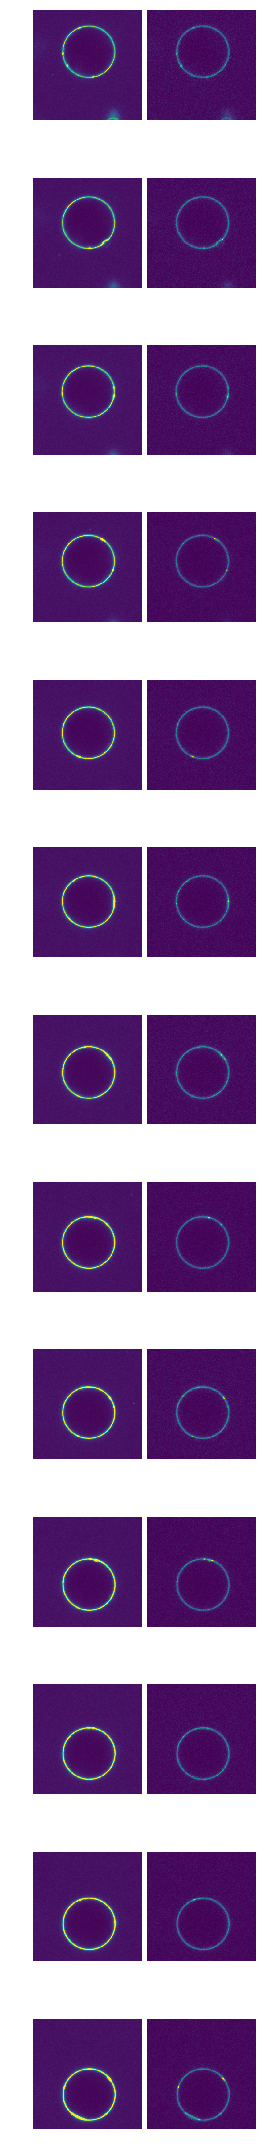

In [15]:
# Get an overview of the movie

fig = plt.figure(figsize = (4,40))

for i in range(0,len(ch0)):
    ax = plt.subplot2grid((len(ch0), 2), (i, 0))
    ax.imshow(ch0[i])
    ax.axis('off')
    
    ax = plt.subplot2grid((len(ch0), 2), (i, 1))
    ax.imshow(ch1[i])
    ax.axis('off')
    
plt.subplots_adjust(hspace=0.01,wspace=0.05)

plt.show()                 

/Users/johannesschoeneberg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


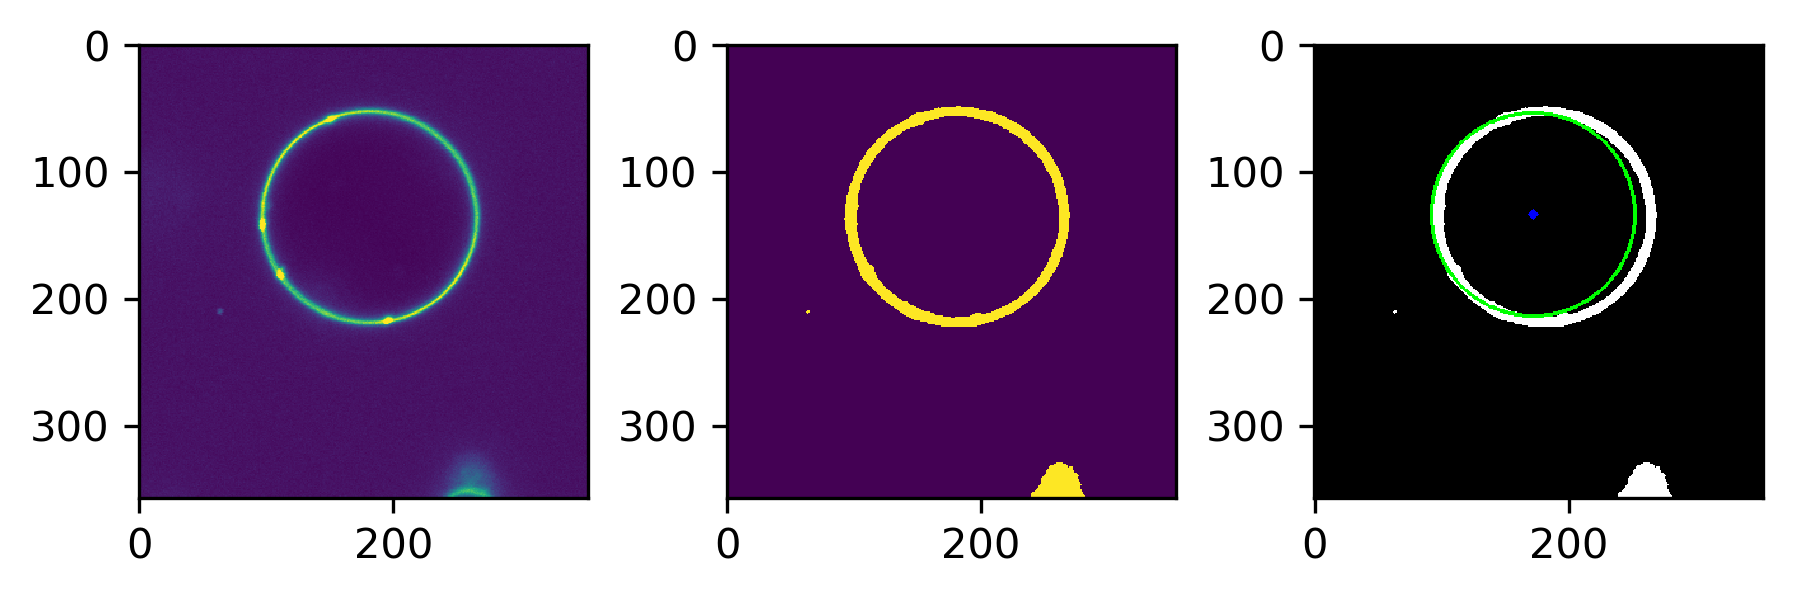

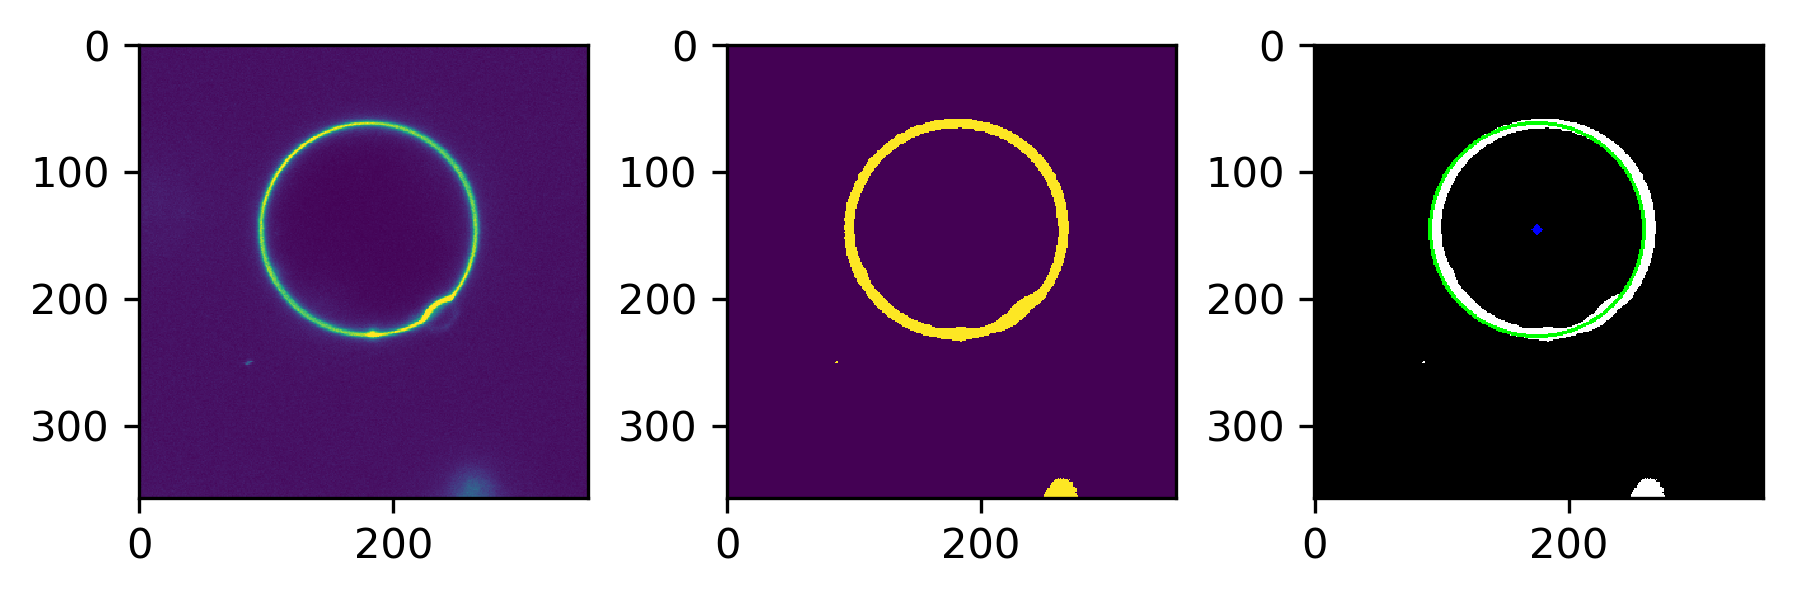

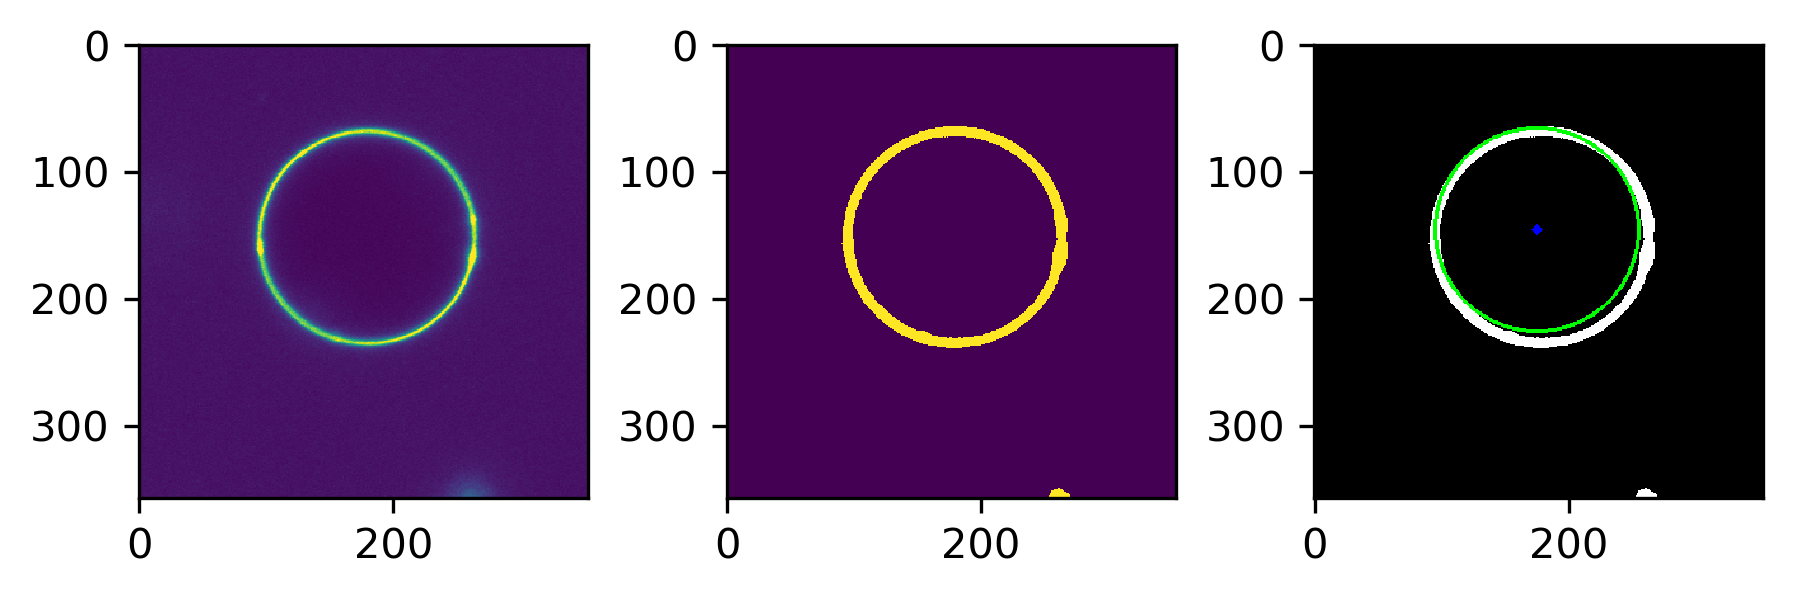

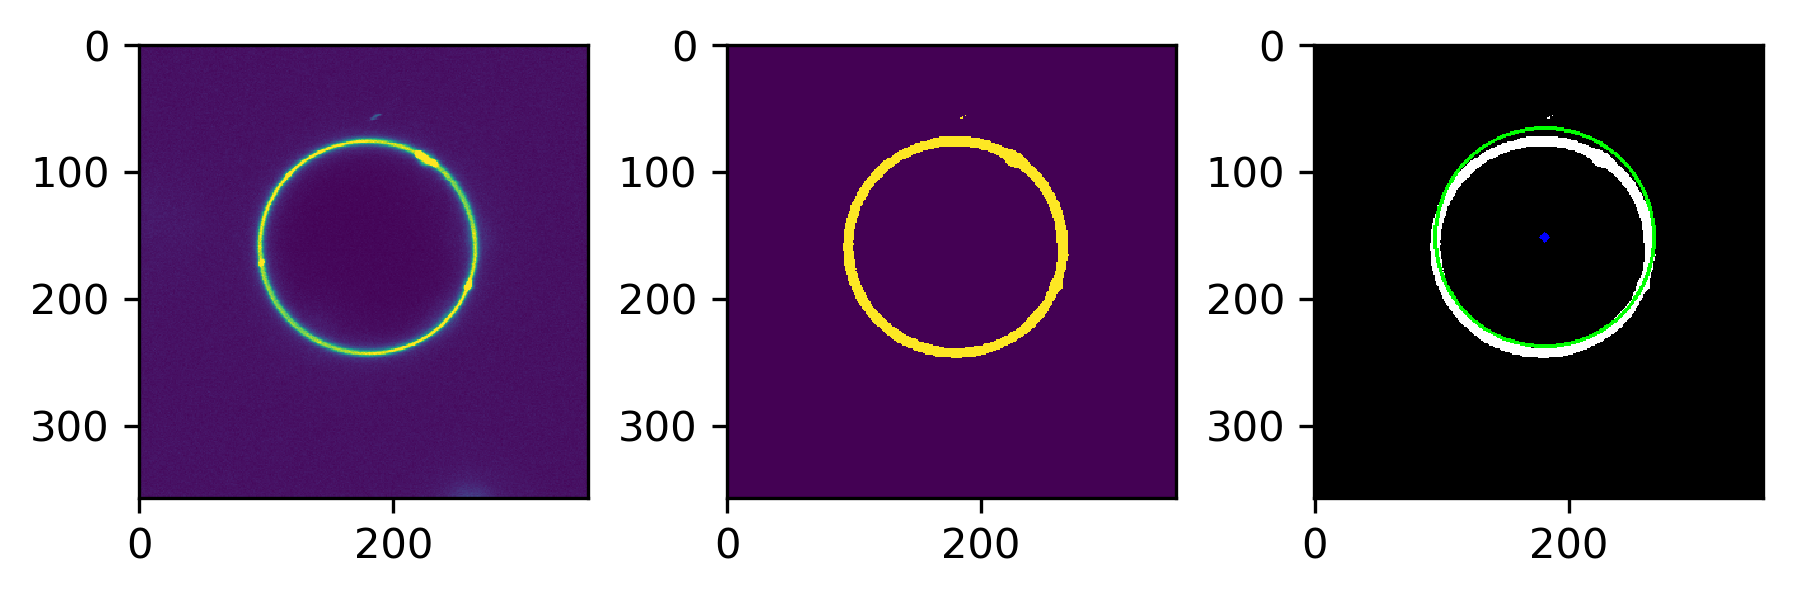

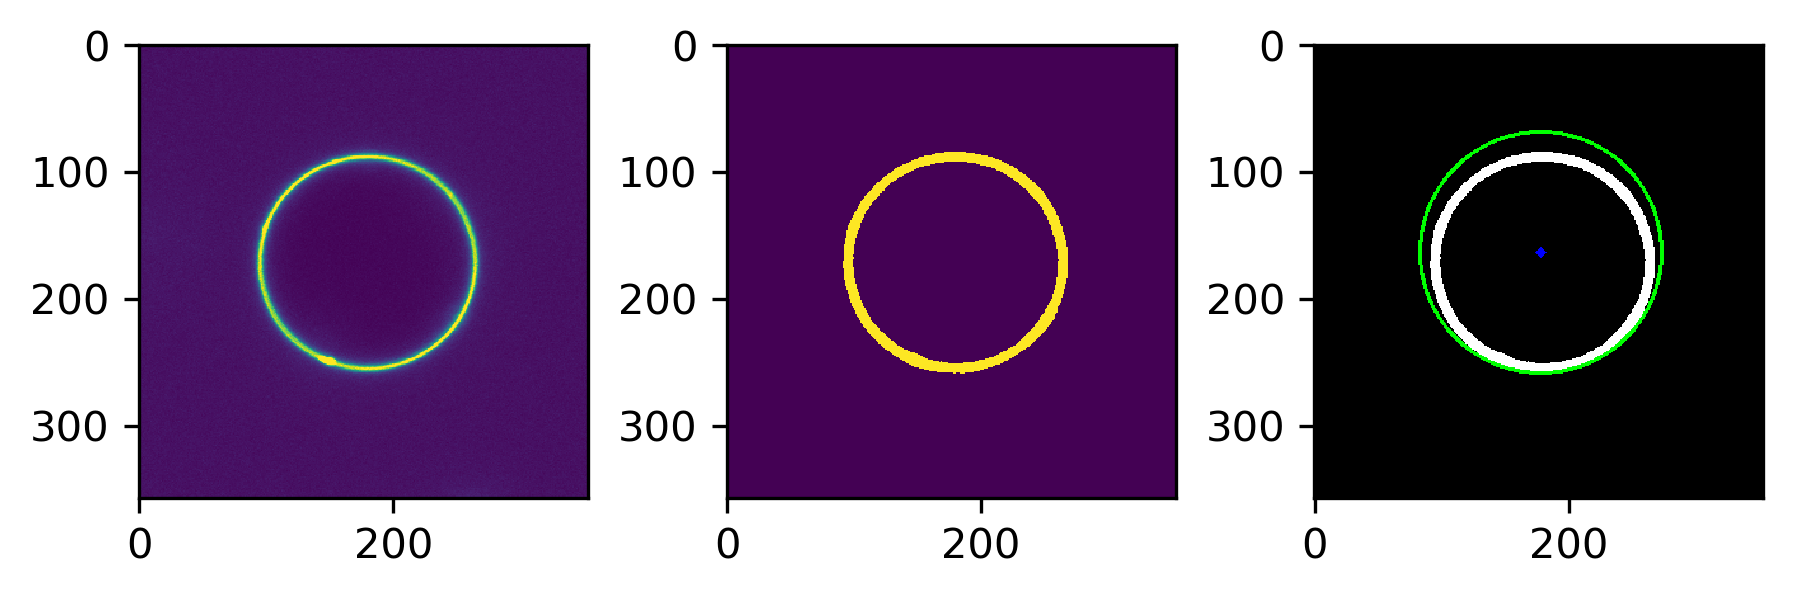

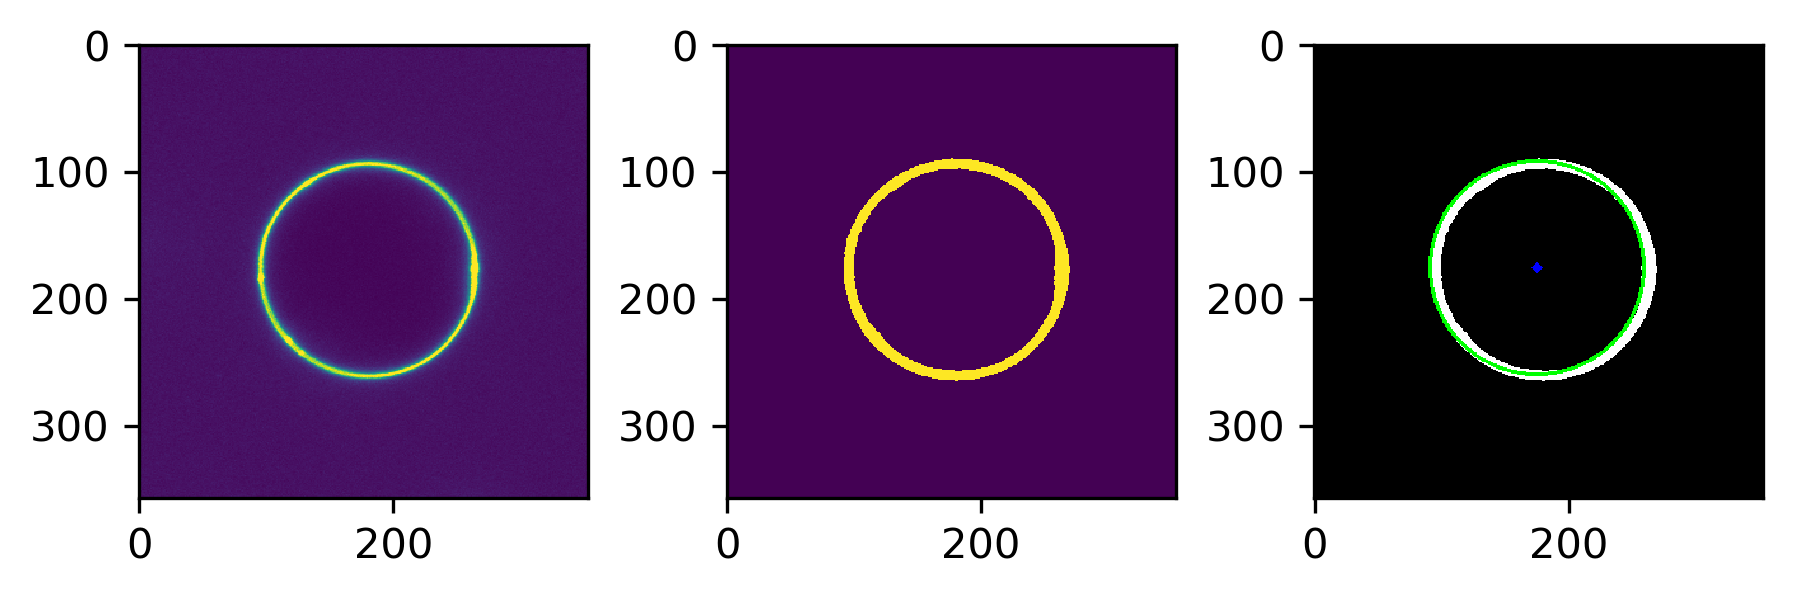

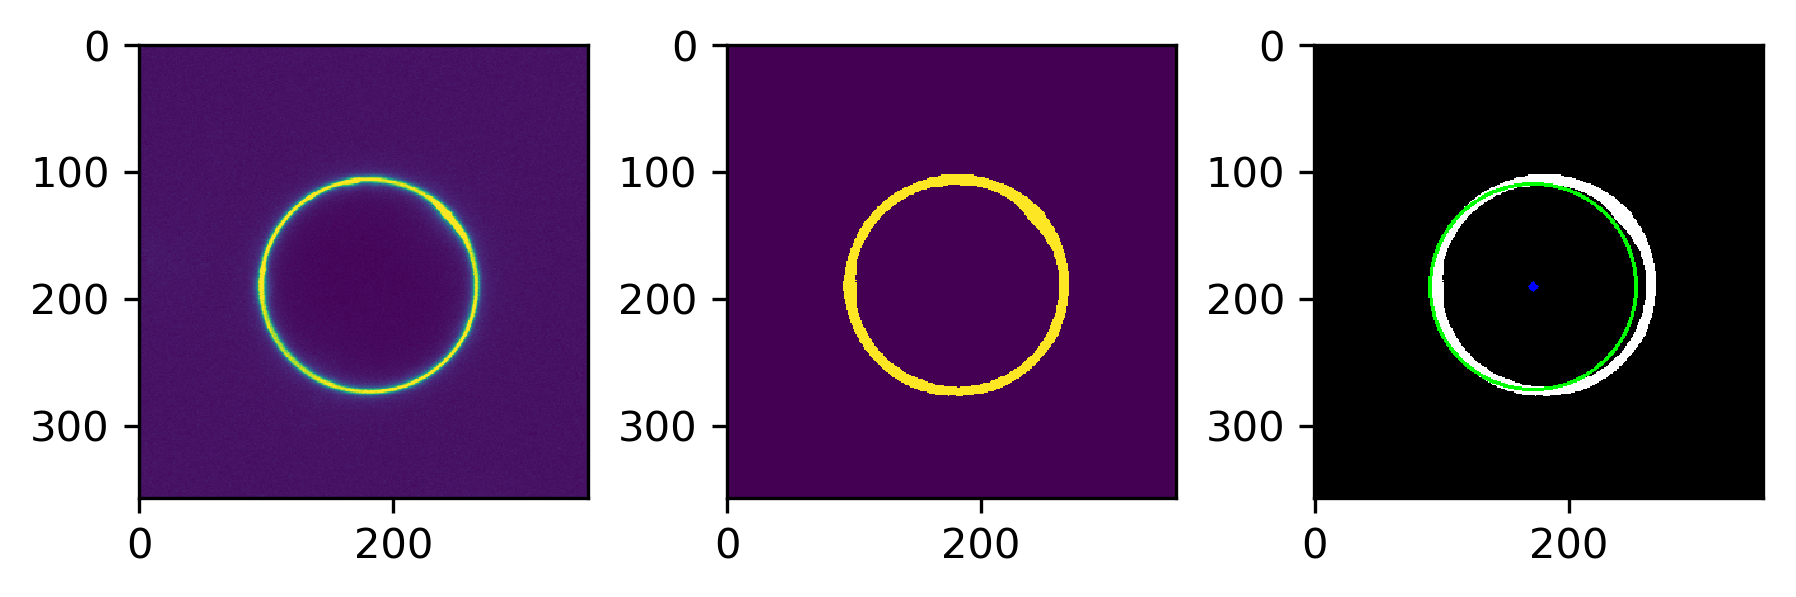

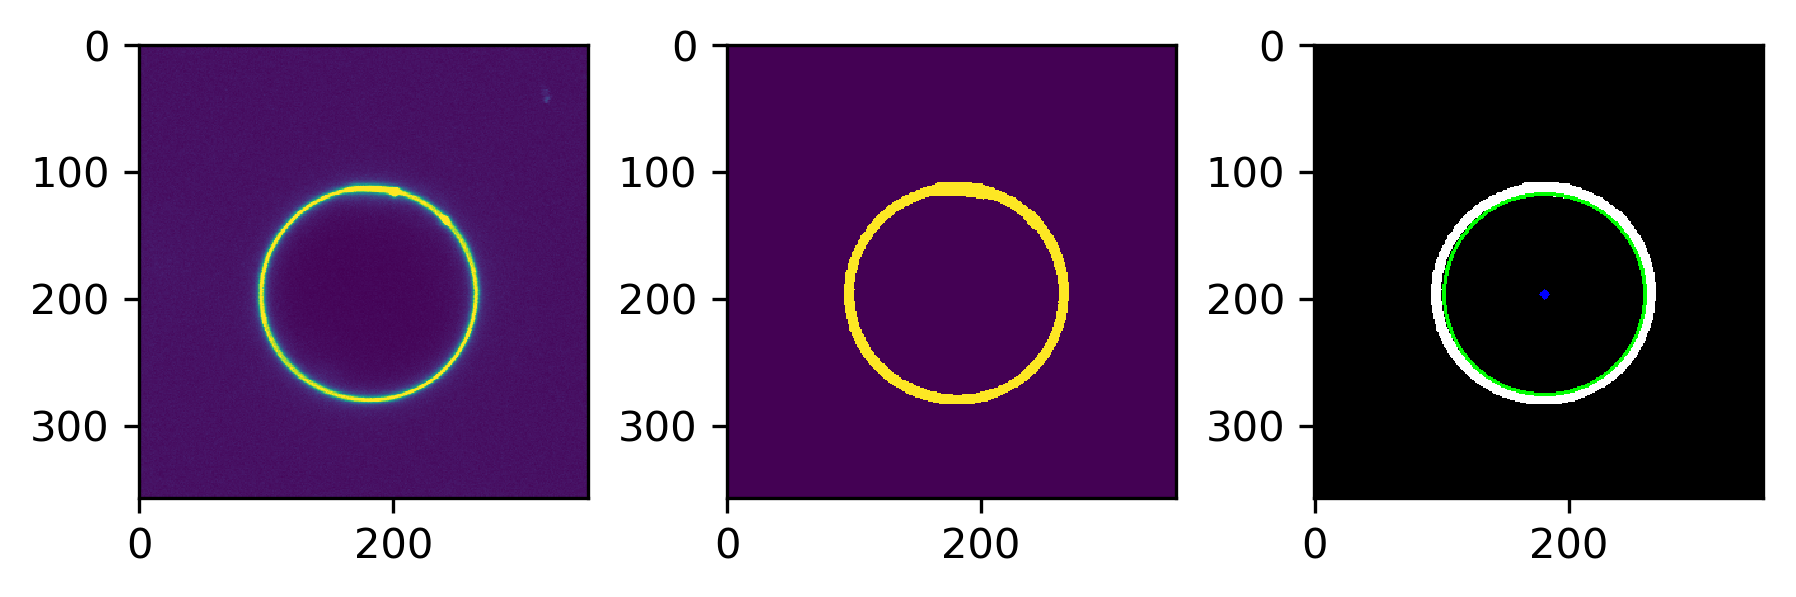

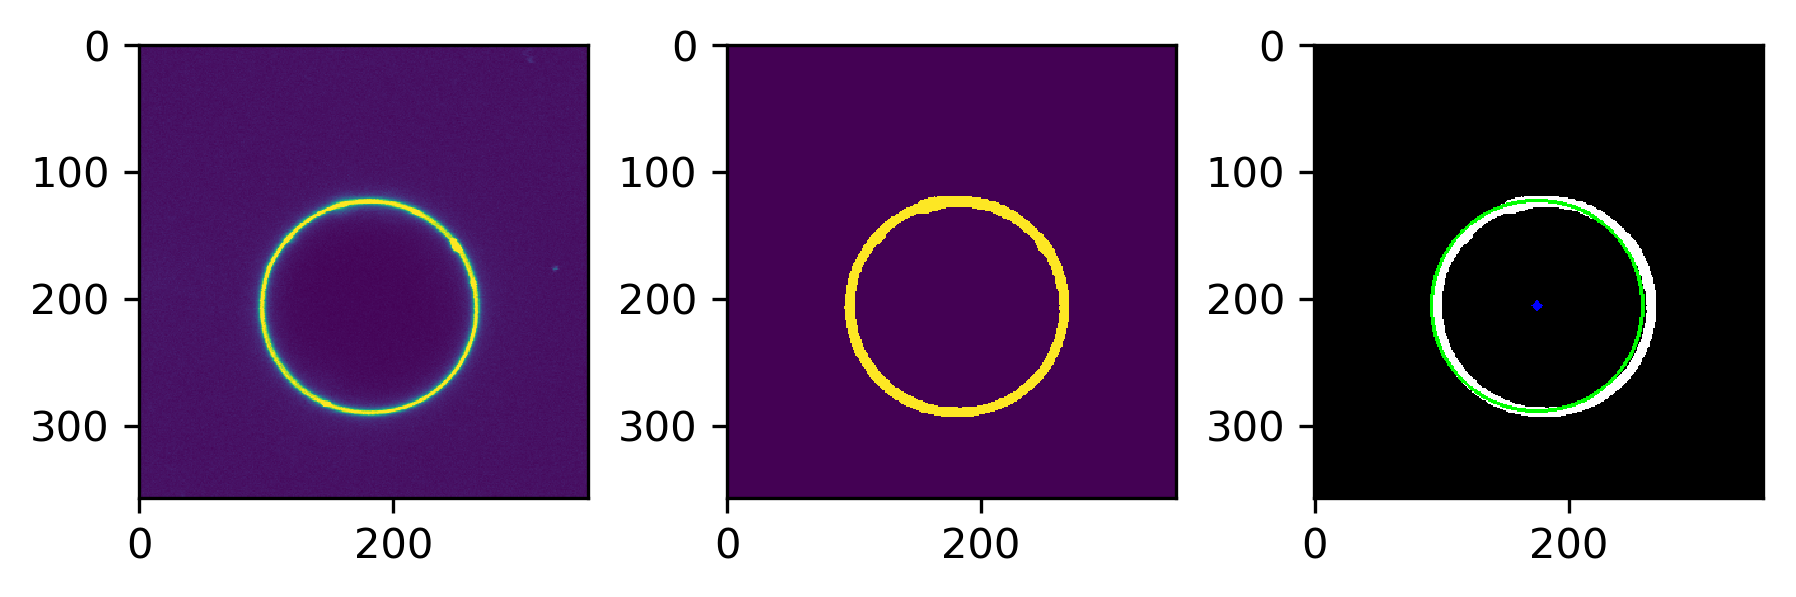

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


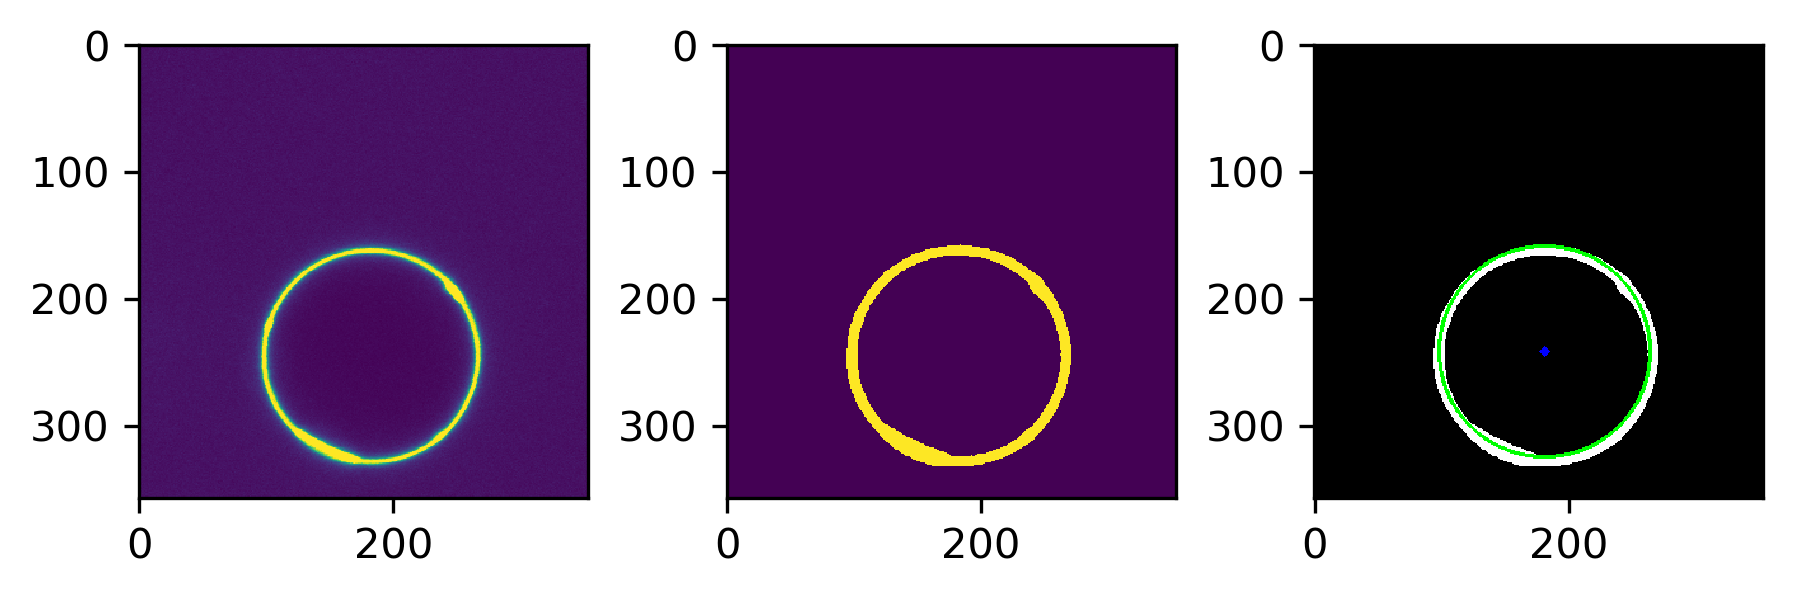

In [16]:
circlesPerFrame = []
frameDropped = []

frameId = 0
for image in ch0:

    global_thresh = threshold_li(image)
    binary_global = image > global_thresh
    
    img = binary_global.astype('uint8')*255
    
    
    img = cv2.medianBlur(img,3)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    
    
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1.5,220,param1=20,param2=30,minRadius=70,maxRadius=100)
    #circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,2,220,param1=20,param2=30,minRadius=30,maxRadius=100)
    
    if(circles!=None):
        circles = np.uint16(np.around(circles))
    else:
        frameDropped.append([frameId,True])
        print("FRAME DROPPED")
        circlesPerFrame.append([[]])
        frameId = frameId+1
        continue
        
    circlesPerFrame.append(circles[0])
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
    #cv2.imshow('detected circles',cimg)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    fig = plt.figure(figsize=(7,2),dpi=300)
    ax = fig.subplots(nrows=1, ncols=3)
    
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.imshow(img)
    plt.subplot(1, 3, 3)
    plt.imshow(cimg)
    #plt.tight_layout()
    plt.subplots_adjust(hspace=0.01,wspace=0.3)
    frameDropped.append([frameId,False]) 
    frameId = frameId+1


In [17]:
print(frameDropped)

[[0, False], [1, False], [2, False], [3, False], [4, False], [5, False], [6, False], [7, False], [8, False], [9, False], [10, False], [11, False], [12, False]]


# take only the best ones

In [18]:
numberOfBest = 1
yTheshold = 200
xTheshold = 400
circlesPerFrame_best = []
index = 0
for circles in circlesPerFrame:

    circlesRow = []
    for i in range(0,len(circles)):
        if(i<numberOfBest):
            circlesRow.append(circles[i])    
    circlesPerFrame_best.append(circlesRow)


    index = index+1

# Calculate the intensities from each image

IMAGE ID:  0
+++++++++++++++++++++++++++++++++++++++++++++
[array([172, 133,  80], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  428.79
averagePixelIntensity ch2_frame  208.4


/Users/johannesschoeneberg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


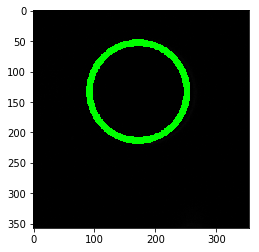

---
IMAGE ID:  1
+++++++++++++++++++++++++++++++++++++++++++++
[array([175, 145,  84], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  446.79
averagePixelIntensity ch2_frame  213.76


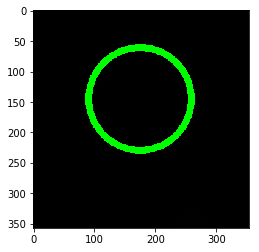

---
IMAGE ID:  2
+++++++++++++++++++++++++++++++++++++++++++++
[array([175, 145,  80], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  430.71
averagePixelIntensity ch2_frame  206.81


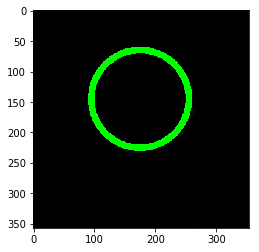

---
IMAGE ID:  3
+++++++++++++++++++++++++++++++++++++++++++++
[array([181, 151,  86], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  422.88
averagePixelIntensity ch2_frame  204.37


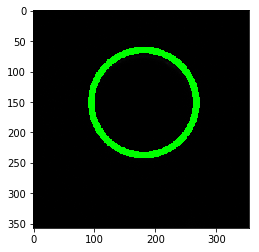

---
IMAGE ID:  4
+++++++++++++++++++++++++++++++++++++++++++++
[array([178, 163,  95], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  413.3
averagePixelIntensity ch2_frame  198.93


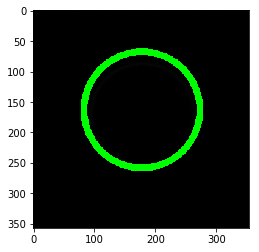

---
IMAGE ID:  5
+++++++++++++++++++++++++++++++++++++++++++++
[array([175, 175,  84], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  467.17
averagePixelIntensity ch2_frame  218.06


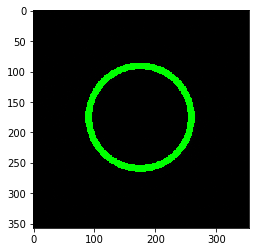

---
IMAGE ID:  6
+++++++++++++++++++++++++++++++++++++++++++++
[array([172, 190,  81], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  474.49
averagePixelIntensity ch2_frame  221.76


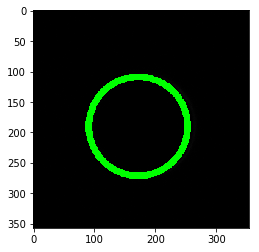

---
IMAGE ID:  7
+++++++++++++++++++++++++++++++++++++++++++++
[array([181, 196,  79], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  472.92
averagePixelIntensity ch2_frame  221.31


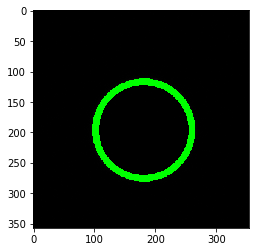

---
IMAGE ID:  8
+++++++++++++++++++++++++++++++++++++++++++++
[array([175, 205,  83], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  484.88
averagePixelIntensity ch2_frame  224.83


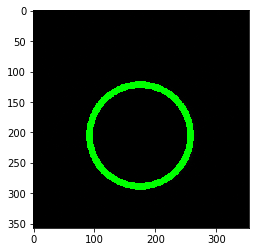

---
IMAGE ID:  9
+++++++++++++++++++++++++++++++++++++++++++++
[array([178, 214,  82], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  475.81
averagePixelIntensity ch2_frame  225.06


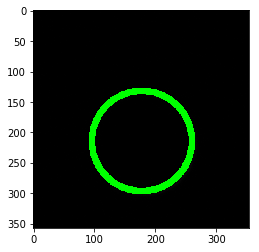

---
IMAGE ID:  10
+++++++++++++++++++++++++++++++++++++++++++++
[array([187, 226,  84], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  490.17
averagePixelIntensity ch2_frame  225.52


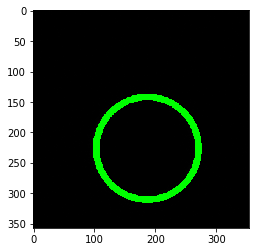

---
IMAGE ID:  11
+++++++++++++++++++++++++++++++++++++++++++++
[array([184, 235,  86], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  487.37
averagePixelIntensity ch2_frame  225.39


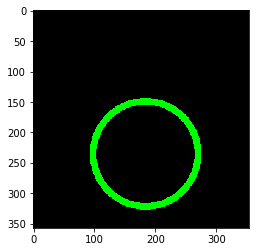

---
IMAGE ID:  12
+++++++++++++++++++++++++++++++++++++++++++++
[array([181, 241,  83], dtype=uint16)]
INDEX:  0
averagePixelIntensity ch1_frame  508.94
averagePixelIntensity ch2_frame  241.22


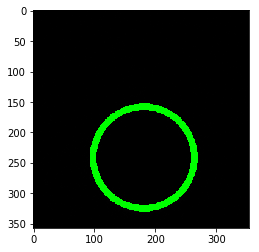

---


In [19]:
results = []
resultspd = []
for imageId in range(0,len(ch0)):
    print("IMAGE ID: ",imageId)
    indexToCheck = imageId
    
    resultsForThisImage = []
    ch1_frame = ch0[imageId] 
    ch2_frame = ch1[imageId] 

    circles = circlesPerFrame_best[imageId]

    print("+++++++++++++++++++++++++++++++++++++++++++++")
    

    index = 0
    if(len(circles) != 0 and circles!=[[]]) :
        print(circles)
        for i in circles:


            print('INDEX: ',index)
            # draw the outer circle
            img2 = ch2_frame
            img8 = (img2/256).astype('uint8')
            tmp_img = cv2.cvtColor(img8,cv2.COLOR_GRAY2BGR)
            cv2.circle(tmp_img,(i[0],i[1]),i[2],(0,255,0),10)# the last parameter is the thickness
            plt.imshow(tmp_img)
            circlePixelIndexes = np.where(tmp_img==255)
            realPixelIntensities_ch1_frame = ch1_frame[circlePixelIndexes[0:1]]
            averagePixelIntensity_ch1_frame = np.round(np.mean(realPixelIntensities_ch1_frame),2)
            print("averagePixelIntensity ch1_frame ",averagePixelIntensity_ch1_frame)
            #
            realPixelIntensities_ch2_frame = ch2_frame[circlePixelIndexes[0:1]]
            averagePixelIntensity_ch2_frame = np.round(np.mean(realPixelIntensities_ch2_frame),2)
            print("averagePixelIntensity ch2_frame ",averagePixelIntensity_ch2_frame)
            
            resultsForThisImage.append([index,averagePixelIntensity_ch1_frame,averagePixelIntensity_ch2_frame])#,averagePixelIntensity_ch3_frame])
            resultspd.append([imageId,index,averagePixelIntensity_ch1_frame,averagePixelIntensity_ch2_frame,None,i[0],i[1],i[2]])
            
            plt.show()
            print("---")
            index = index +1
    else:
        print("SOMETHING")
        resultspd.append([imageId,index,None,None,None,None,None,None])
                         
    results.append(resultsForThisImage)

In [20]:
import pandas as pd
df = pd.DataFrame(resultspd)
df.columns = ['FrameId', 'VesicleId','IntCh1','IntCh2','IntCh3','xCoord','yCoord','radius']
df.to_csv(movie_filename+".csv")
df[0:5]

,FrameId,VesicleId,IntCh1,IntCh2,IntCh3,xCoord,yCoord,radius
0,0,0,428.79,208.40,None,172,133,80
1,1,0,446.79,213.76,None,175,145,84
2,2,0,430.71,206.81,None,175,145,80
3,3,0,422.88,204.37,None,181,151,86
4,4,0,413.30,198.93,None,178,163,95


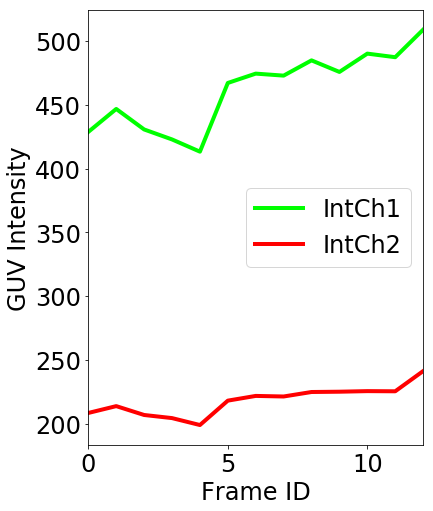

In [36]:
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = "24"
plt.rcParams["axes.labelweight"] = "normal"

dfmean = df.groupby(['FrameId'])[['IntCh1', 'IntCh2']].mean()
dfstd = df.groupby(['FrameId'])[['IntCh1', 'IntCh2']].std()
plt.figure(dpi=150)
dfmean.plot(yerr=dfstd,figsize=[6,8],color=['lime', 'r', 'orange'],lw=4)
plt.xlabel("Frame ID")
plt.ylabel("GUV Intensity")
plt.show()